<a href="https://colab.research.google.com/github/Julia-Vanyarina/14_03/blob/main/airflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving airflow.csv to airflow.csv


In [3]:
import pandas as pd
# Загружаем данные
df = pd.read_csv('airflow.csv',delimiter=';')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype                    
---  ------             --------------  -----                    
 0   id                 40 non-null     object                   
 1   name               40 non-null     object                   
 2   age                40 non-null     int64                    
 3   adress             40 non-null     object                   
 4   email              40 non-null     object                   
 5   phone number       40 non-null     object                   
 6   registration date  40 non-null     datetime64[ns, UTC+03:00]
 7   created at         40 non-null     object                   
 8   updated at         40 non-null     object                   
 9   deleted at         0 non-null      float64                  
 10  city               40 non-null     object                   
dtypes: datetime64[ns, UTC+03:00](1), f

In [11]:
df['created at'] = pd.to_datetime(df['created at'])
df['updated at'] = pd.to_datetime(df['updated at'])
# Удаление колонки 'deleted at'
df.drop(columns=['deleted at'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype                    
---  ------             --------------  -----                    
 0   id                 40 non-null     object                   
 1   name               40 non-null     object                   
 2   age                40 non-null     int64                    
 3   adress             40 non-null     object                   
 4   email              40 non-null     object                   
 5   phone number       40 non-null     object                   
 6   registration date  40 non-null     datetime64[ns, UTC+03:00]
 7   created at         40 non-null     datetime64[ns, UTC+03:00]
 8   updated at         40 non-null     datetime64[ns, UTC+03:00]
 9   city               40 non-null     object                   
dtypes: datetime64[ns, UTC+03:00](3), int64(1), object(6)
memory usage: 3.3+ KB
None


In [12]:
df.head()

,id,name,age,adress,email,phone number,registration date,created at,updated at,city
0,228763c9-8461-4d92-93a1-e280988b1330,Харитон Анисимович Кононов,21,"с. Орск, алл. Циолковского, д. 428 стр. 8, 142982",vera_2014@example.net,75 291 371 402,2024-06-08 16:46:59.026000+03:00,2024-12-01 03:27:49.942000+03:00,2025-03-14 16:05:21.352000+03:00,с. Орск
1,9a984704-23eb-4153-843a-3ead2782e255,Чернов Юлиан Изотович,62,"клх Калач-на-Дону, бул. Базарный, д. 21 к. 7/4...",savva_09@example.com,74 788 036 419,2025-02-14 22:46:08.245000+03:00,2024-05-23 21:39:59.674000+03:00,2025-03-14 16:06:13.679000+03:00,клх Калач-на-Дону
2,6847b932-4c19-42da-85ef-df5e0d96971f,Гордеев Кондратий Игнатьевич,53,"г. Макушино, ул. Семашко, д. 195, 159093",arhipgrishin@example.net,+7 (406) 777-77-11,2024-11-06 04:59:48.020000+03:00,2024-10-08 19:46:05.617000+03:00,2025-03-14 16:06:51.815000+03:00,г. Макушино
3,b333d1c0-353c-4031-8850-d3b7532042d3,Ираида Ждановна Матвеева,99,"д. Воткинск, пр. Водопроводный, д. 91 стр. 97,...",vatslav1982@example.net,8 775 143 03 11,2024-10-27 00:42:35.803000+03:00,2025-02-12 20:53:54.096000+03:00,2025-03-14 16:07:11.461000+03:00,д. Воткинск
4,9638d9f5-3f30-47d7-b532-886e82c4b379,Вероника Алексеевна Зуева,34,"ст. Хасан, пер. Шахтерский, д. 7/2 к. 96, 215813",lukinaalina@example.net,+7 (777) 439-3593,2025-03-12 17:02:30.570000+03:00,2024-06-01 21:11:14.934000+03:00,2025-03-14 16:07:21.514000+03:00,ст. Хасан


In [13]:
# Анализ возраста
average_age = df['age'].mean()
min_age = df['age'].min()
max_age = df['age'].max()

print(f"Средний возраст: {average_age:.2f}")
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")

Средний возраст: 55.25
Минимальный возраст: 19
Максимальный возраст: 99


In [14]:
# Извлечение города из адреса
df['city'] = df['adress'].str.split(',').str[0]

# Топ-5 городов по количеству людей
top_cities = df['city'].value_counts().head(5)

print("Топ-5 городов по количеству проживающих:")
print(top_cities)

Топ-5 городов по количеству проживающих:
city
с. Орск              1
клх Калач-на-Дону    1
п. Усть-Джегута      1
ст. Калач            1
клх Видное           1
Name: count, dtype: int64


In [20]:
df['registration date'] = pd.to_datetime(df['registration date'])
current_time = pd.Timestamp.now(tz='UTC+03:00')
# Фильтрация данных за последний год
last_year = df[df['registration date'] >= current_time - pd.DateOffset(years=1)]
# Группировка по месяцам
registrations_by_month = last_year.groupby(last_year['registration date'].dt.to_period('M')).size()
print("Количество регистраций по месяцам за последний год:")
print(registrations_by_month)

datetime64[ns, UTC+03:00]
Количество регистраций по месяцам за последний год:
registration date
2024-04    6
2024-05    2
2024-06    3
2024-07    1
2024-08    4
2024-09    2
2024-10    5
2024-11    4
2024-12    5
2025-01    2
2025-02    4
2025-03    2
Freq: M, dtype: int64


<ipython-input-20-200f70e972cf>:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  registrations_by_month = last_year.groupby(last_year['registration date'].dt.to_period('M')).size()


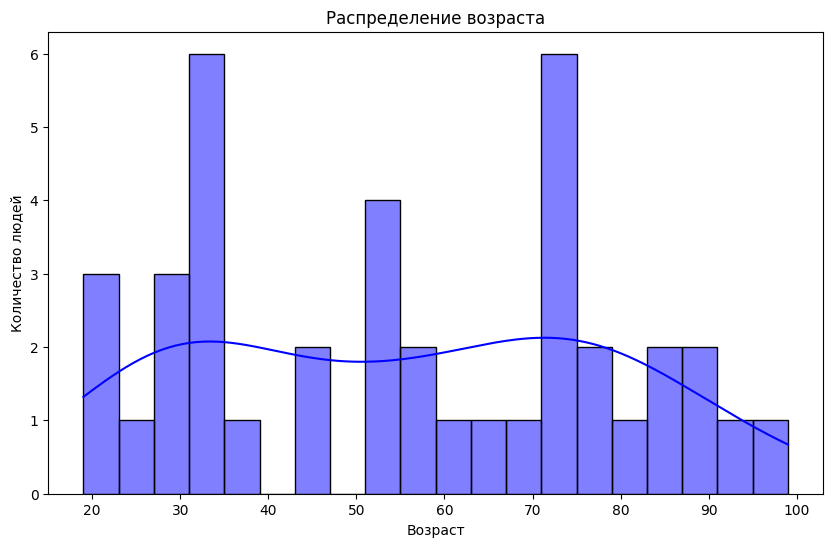

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма возраста
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

<ipython-input-17-c656224723fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


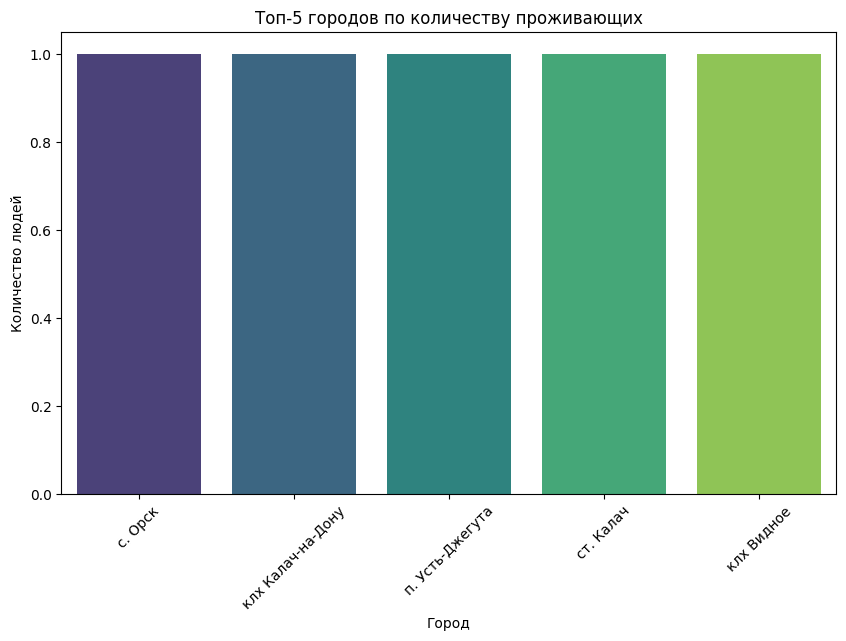

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Топ-5 городов по количеству проживающих')
plt.xlabel('Город')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.show()

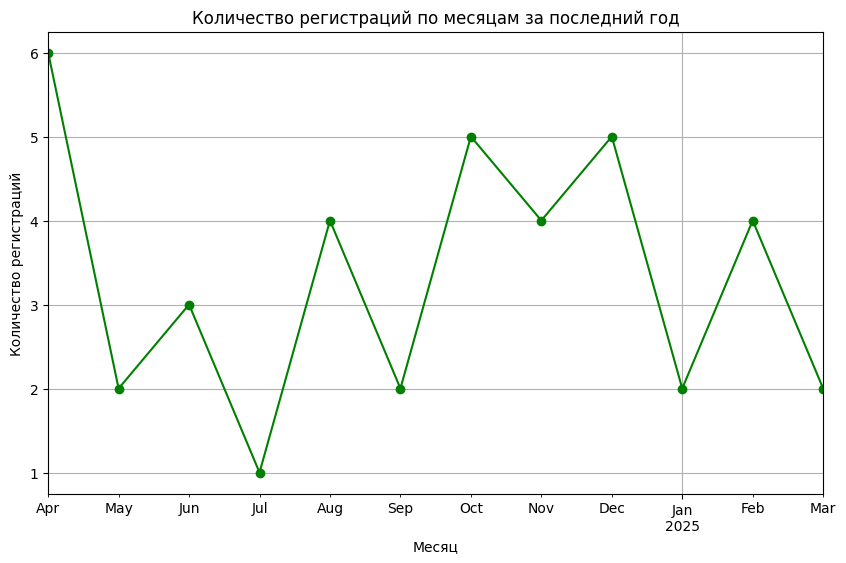

In [21]:
plt.figure(figsize=(10, 6))
registrations_by_month.plot(kind='line', marker='o', color='green')
plt.title('Количество регистраций по месяцам за последний год')
plt.xlabel('Месяц')
plt.ylabel('Количество регистраций')
plt.grid(True)
plt.show()